In [135]:
import numpy as np
import scipy as sp
import scipy.interpolate
import matplotlib.pyplot as plt
import minkowski_tools as mt

In [195]:
import importlib
importlib.reload(mt)

<module 'minkowski_tools' from '/Users/matthewcotton/OneDrive - Imperial College London/UROP Summer 2020/DAGmetrics/minkowski_tools.py'>

In [221]:
n=5000
rand_points = np.random.uniform(size=(2, n-2))
edge_points = np.array([[0.0, 1.0],[0.0, 1.0]])
points = np.concatenate((rand_points, edge_points), axis=1)

In [252]:
connections = mt.get_connections(points, pval=2, radius=.05)
short_path, short_length = mt.shortest_path(connections)

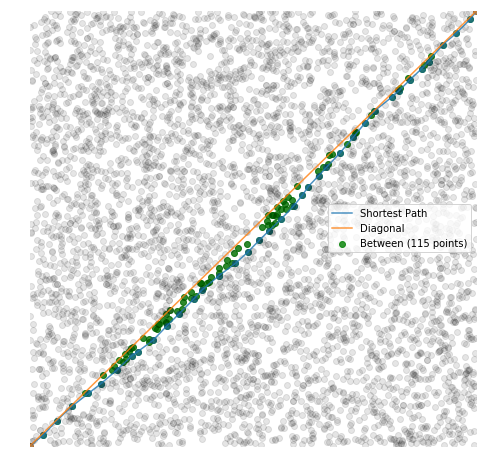

In [253]:
short_path_points = np.array([points[:, u] for u in short_path]).transpose()
fig, ax = plt.subplots(figsize=(8, 8))
betweens = mt.points_between(points, short_path_points)
ax.scatter(*points[:, betweens], c='g', alpha=0.8, label='Between ({} points)'.format(np.sum(betweens)))
mt.plot_path_points(ax, paths=[short_path_points, np.array([[0, 1], [0, 1]])], path_labels=['Shortest Path', 'Diagonal'])
ax.scatter(*points, c='k', alpha=0.1)

In [235]:
long_path, long_length = mt.longest_path(connections)

In [ ]:
# fig, axes = plt.subplots(ncols=2,figsize=(10, 5))
# ax, ax2 = axes

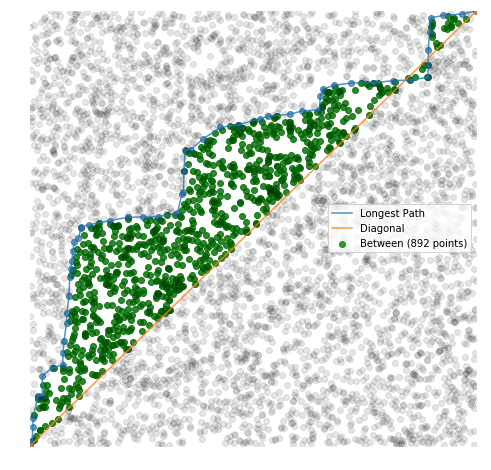

In [255]:
long_path_points = np.array([points[:, u] for u in long_path]).transpose()
fig, ax = plt.subplots(figsize=(8, 8))
betweens = mt.points_between(points, long_path_points)
ax.scatter(*points[:, betweens], c='g', alpha=0.8, label='Between ({} points)'.format(np.sum(betweens)))
mt.plot_path_points(ax, paths=[long_path_points, np.array([[0, 1], [0, 1]])], path_labels=['Longest Path', 'Diagonal'])
ax.scatter(*points, c='k', alpha=0.1)

35.46493809147326


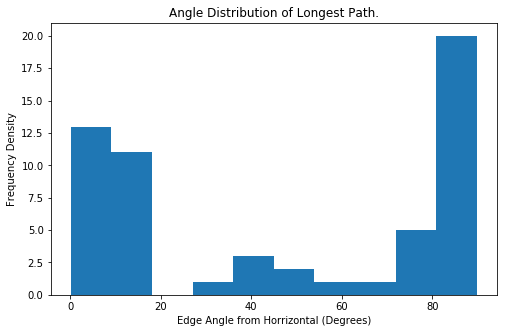

In [271]:
fig, ax = plt.subplots(figsize=(8, 5))
long_angles = mt.path_angles(long_path_points)*180/np.pi #puts into degrees
ax.hist(long_angles)
ax.set(title='Angle Distribution of Longest Path.', xlabel='Edge Angle from Horrizontal (Degrees)', ylabel='Frequency Density')
print(np.std(long_angles))

In [275]:
n=8000
n_systems = 10

ps, rs = [0.8, 1, 1.2], [0.2, 0.1, 0.1]

ps = [0.6, 0.8, 1, 1.2, 1.4]
r_rel = np.array([1.43, 1.14, 1, 0.92, 0.87])
rs = r_rel/30

ensemble_points = [np.concatenate((np.random.uniform(size=(2, n-2)), np.array([[0.0, 1.0],[0.0, 1.0]])), axis=1) for count in range(n_systems)]

ensemble_short_paths = []

for points, i in zip(ensemble_points, range(n_systems)):
    print(i)
    print('Getting connections', end='')
    diff_connections = [mt.get_connections(points, pval=p, radius=r) for p, r,label in zip(ps, rs, path_labels) if not print(': '+ label, end=' ')]
    print()
    print('Getting shortest paths', end='')
    short_paths = [mt.shortest_path(connections)[0] for connections, label in zip(diff_connections, path_labels) if not print(': '+ label, end=' ')]
    print()    
    
    short_path_points = {p:np.array([points[:, u] for u in path]).transpose() for p, path in zip(ps, short_paths)}
    ensemble_short_paths.append(short_path_points)

0
Getting connections: p=0.6, r=0.0715 : p=0.8, r=0.057 : p=1, r=0.05 : p=1.2, r=0.046 : p=1.4, r=0.0435 
Getting shortest paths: p=0.6, r=0.0715 : p=0.8, r=0.057 : p=1, r=0.05 : p=1.2, r=0.046 : p=1.4, r=0.0435 
1
Getting connections: p=0.6, r=0.0715 : p=0.8, r=0.057 : p=1, r=0.05 : p=1.2, r=0.046 : p=1.4, r=0.0435 
Getting shortest paths: p=0.6, r=0.0715 : p=0.8, r=0.057 : p=1, r=0.05 : p=1.2, r=0.046 : p=1.4, r=0.0435 
2
Getting connections: p=0.6, r=0.0715 : p=0.8, r=0.057 : p=1, r=0.05 : p=1.2, r=0.046 : p=1.4, r=0.0435 
Getting shortest paths: p=0.6, r=0.0715 : p=0.8, r=0.057 : p=1, r=0.05 : p=1.2, r=0.046 : p=1.4, r=0.0435 
3
Getting connections: p=0.6, r=0.0715 : p=0.8, r=0.057 : p=1, r=0.05 : p=1.2, r=0.046 : p=1.4, r=0.0435 
Getting shortest paths: p=0.6, r=0.0715 : p=0.8, r=0.057 : p=1, r=0.05 : p=1.2, r=0.046 : p=1.4, r=0.0435 
4
Getting connections: p=0.6, r=0.0715 : p=0.8, r=0.057 : p=1, r=0.05 : p=1.2, r=0.046 : p=1.4, r=0.0435 
Getting shortest paths: p=0.6, r=0.0715 : 

KeyError: 7999

/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


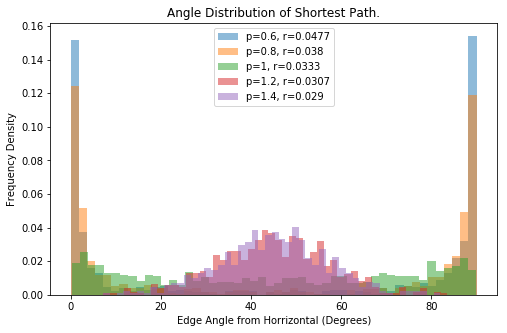

In [276]:
fig, ax = plt.subplots(figsize=(8, 5))

for p, r in zip(ps, rs):
    flat_angles = (np.concatenate([mt.path_angles(all_paths[p]) for all_paths in ensemble_short_paths], axis=0))
    ax.hist(flat_angles*180/np.pi, label='p={}, r={:.3}'.format(p, r), alpha=0.5, bins=50, normed=1)

ax.set(title='Angle Distribution of Shortest Path.', xlabel='Edge Angle from Horrizontal (Degrees)', ylabel='Frequency Density')
ax.legend()
plt.savefig('img/2ang_dist_10_8e3_30.pdf')

/Users/matthewcotton/OneDrive - Imperial College London/UROP Summer 2020/DAGmetrics/minkowski_tools.py:51: RuntimeWarning: invalid value encountered in power
  distsp = (x_diffs**pval + y_diffs**pval)*(x_diffs>0)*(y_diffs>0)
/Users/matthewcotton/OneDrive - Imperial College London/UROP Summer 2020/DAGmetrics/minkowski_tools.py:52: RuntimeWarning: invalid value encountered in less
  connections = (((distsp<radp)*distsp)**(1/pval))*(x_diffs>0)*(y_diffs>0)


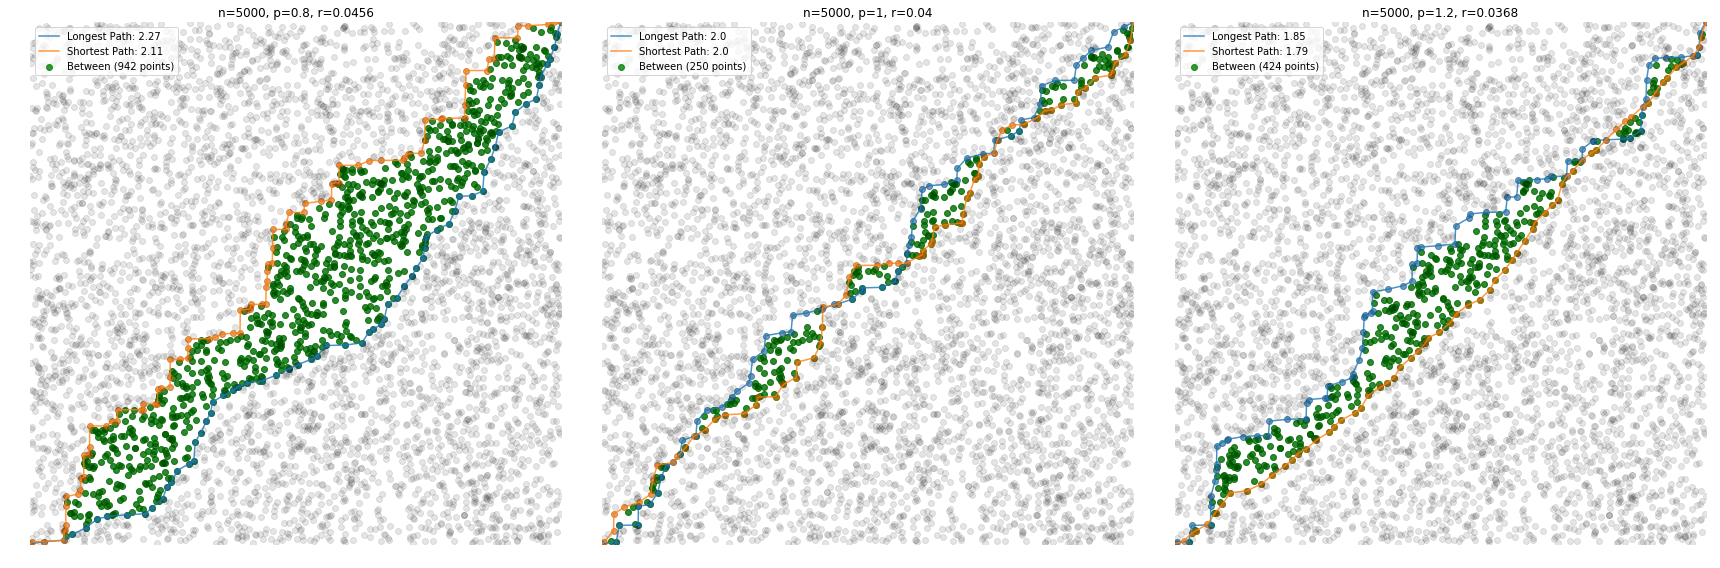

In [288]:
n=5000
rand_points = np.random.uniform(size=(2, n-2))
edge_points = np.array([[0.0, 1.0],[0.0, 1.0]])
points = np.concatenate((rand_points, edge_points), axis=1)

fig, axes = plt.subplots(ncols=3,figsize=(24, 8))

ps, rs = [0.8, 1, 1.2], np.array([1.14, 1, 0.92])/25

for p, r, ax in zip(ps, rs, axes.flatten()):

    connections = mt.get_connections(points, pval=p, radius=r)

    short_path, short_dist = mt.shortest_path(connections)
    short_path_points = np.array([points[:, u] for u in short_path]).transpose()

    long_path, long_dist = mt.longest_path(connections)
    long_path_points = np.array([points[:, u] for u in long_path]).transpose()

    betweens = mt.points_between(points, long_path_points, short_path_points)
    ax.scatter(*points[:, betweens], c='g', alpha=0.8, label='Between ({} points)'.format(np.sum(betweens)))
    mt.plot_path_points(ax, paths=[long_path_points, short_path_points], path_labels=['Longest Path: {:.3}'.format(long_dist), 'Shortest Path: {:.3}'.format(short_dist)])
    ax.scatter(*points, c='k', alpha=0.1)
    ax.set(title='n={}, p={}, r={:.3}'.format(n, p, r))

plt.tight_layout()
plt.savefig('./img/LongShortComparison.pdf')

In [290]:
n=4000
rand_points = np.random.uniform(size=(2, n-2))
edge_points = np.array([[0.0, 1.0],[0.0, 1.0]])
points = np.concatenate((rand_points, edge_points), axis=1)

In [291]:
rs = np.arange(0.04, 0.06, 0.001)
ps = [2 for _ in range(len(rs))]

av_edges = []

for p, r in zip(ps, rs):
    connections = mt.get_connections(points, pval=p, radius=r)
    av_edges.append(np.sum(connections)/n)

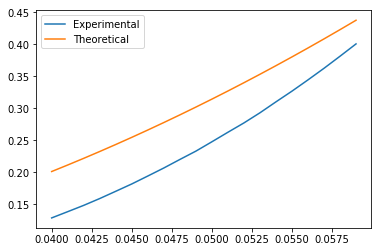

In [298]:
plt.plot(rs, av_edges, label='Experimental')
plt.plot(rs, np.pi*rs*rs*n/100, label='Theoretical')
plt.legend()

In [168]:
np.pi*rs*rs*n/4

array([25.44690049, 26.01552876, 26.59044022, 27.17163486, 27.75911269,
       28.3528737 , 28.9529179 , 29.55924528, 30.17185585, 30.7907496 ,
       31.41592654, 32.04738666, 32.68512997, 33.32915646, 33.97946614,
       34.63605901, 35.29893506, 35.96809429, 36.64353671, 37.32526232,
       38.01327111])

In [179]:
av_edges

[0.12955424099251336,
 0.13960758234077905,
 0.15012443715675183,
 0.16111758594596232,
 0.17222869228359478,
 0.18366776470527177,
 0.19594187634686408,
 0.20813748897401987,
 0.22116786774077382,
 0.2353454427194054,
 0.24947784426819156,
 0.2644395433038308,
 0.2804479373409565,
 0.2964202193633808,
 0.3133301757976486,
 0.330403170295756,
 0.34914788249727197,
 0.36791968425406196,
 0.3866489837988387,
 0.40640546070595684]

In [241]:
example_cons = np.array([[0, 0, 3, 0, 0], [0, 0, 0, 0, 2], [0, 2, 0, 0, 1],[4, 1, 6, 0, 0], [0, 0, 0, 0, 0]]).transpose()

In [244]:
mt.shortest_path(example_cons), mt.longest_path(example_cons)

(([4, 1, 3], 3.0), ([4, 1, 2, 0, 3], 10.0))

In [245]:
example_cons

array([[0, 0, 0, 4, 0],
       [0, 0, 2, 1, 0],
       [3, 0, 0, 6, 0],
       [0, 0, 0, 0, 0],
       [0, 2, 1, 0, 0]])